In [1]:
pip install pandas numpy nltk seaborn matplotlib scikit-learn wordcloud


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: /home/karthik/.local/pipx/venvs/jupyterlab/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [52]:
import nltk
#nltk.download('stopwords')
#nltk.download('punkt_tab')
#nltk.download('wordnet')

In [3]:
# import the required libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [4]:
tweet_df = pd.read_csv('data.csv')
tweet_df.head()
tweet_df.info()
# printing random tweets
print(tweet_df['tweet'].iloc[0],"\n")
print(tweet_df['tweet'].iloc[1],"\n")
print(tweet_df['tweet'].iloc[2],"\n")
print(tweet_df['tweet'].iloc[3],"\n")
print(tweet_df['tweet'].iloc[4],"\n")
#creating a function to process the data
def data_processing(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r"https\S+|www\S+http\S+", '', tweet, flags = re.MULTILINE)
    tweet = re.sub(r'\@w+|\#','', tweet)
    tweet = re.sub(r'[^\w\s]','',tweet)
    tweet = re.sub(r'ð','',tweet)
    tweet = re.sub(r'user', '', tweet)
    tweet = re.sub(r'amp', '', tweet)
    tweet = re.sub(r'â', '', tweet)
    
    tweet_tokens = word_tokenize(tweet)
    filtered_tweets = [w for w in tweet_tokens if not w in stop_words]
    return " ".join(filtered_tweets)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB
 @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run 

@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked 

  bihday your majesty 

#model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦   

 factsguide: society now    #motivation 



In [5]:
tweet_df.tweet = tweet_df['tweet'].apply(data_processing)
tweet_df = tweet_df.drop_duplicates('tweet')
lemmatizer = WordNetLemmatizer()
def lemmatizing(data):
    tweet = [lemmatizer.lemmatize(word) for word in data]
    return data
tweet_df['tweet'] = tweet_df['tweet'].apply(lambda x: lemmatizing(x))
# printing the data to see the effect of preprocessing
print(tweet_df['tweet'].iloc[0],"\n")
print(tweet_df['tweet'].iloc[1],"\n")
print(tweet_df['tweet'].iloc[2],"\n")
print(tweet_df['tweet'].iloc[3],"\n")
print(tweet_df['tweet'].iloc[4],"\n")

father dysfunctional selfish drags kids dysfunction run 

thanks lyft credit cant use cause dont offer wheelchair vans pdx disapointed getthanked 

bihday majesty 

model love u take u time ur 

factsguide society motivation 



<class 'pandas.core.frame.DataFrame'>
Index: 28374 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      28374 non-null  int64 
 1   label   28374 non-null  int64 
 2   tweet   28374 non-null  object
dtypes: int64(2), object(1)
memory usage: 886.7+ KB


,id,label,tweet
0,1,0,father dysfunctional selfish drags kids dysfun...
1,2,0,thanks lyft credit cant use cause dont offer w...
2,3,0,bihday majesty
3,4,0,model love u take u time ur
4,5,0,factsguide society motivation


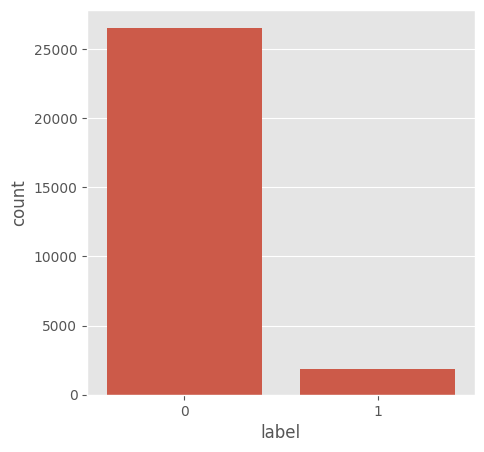

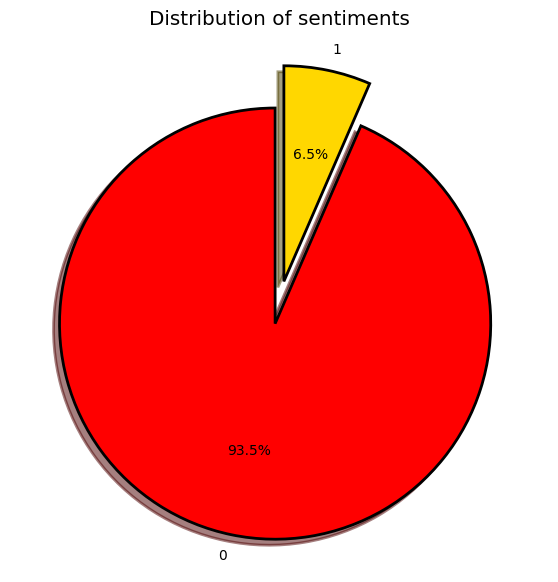

In [6]:
tweet_df.info()
tweet_df['label'].value_counts()
fig = plt.figure(figsize=(5,5))
sns.countplot(x='label', data = tweet_df)
fig = plt.figure(figsize=(7,7))
colors = ("red", "gold")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = tweet_df['label'].value_counts()
explode = (0.1, 0.1)
tags.plot(kind='pie',autopct = '%1.1f%%', shadow=True, colors = colors, startangle =90,
         wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')
non_hate_tweets = tweet_df[tweet_df.label == 0]
non_hate_tweets.head()

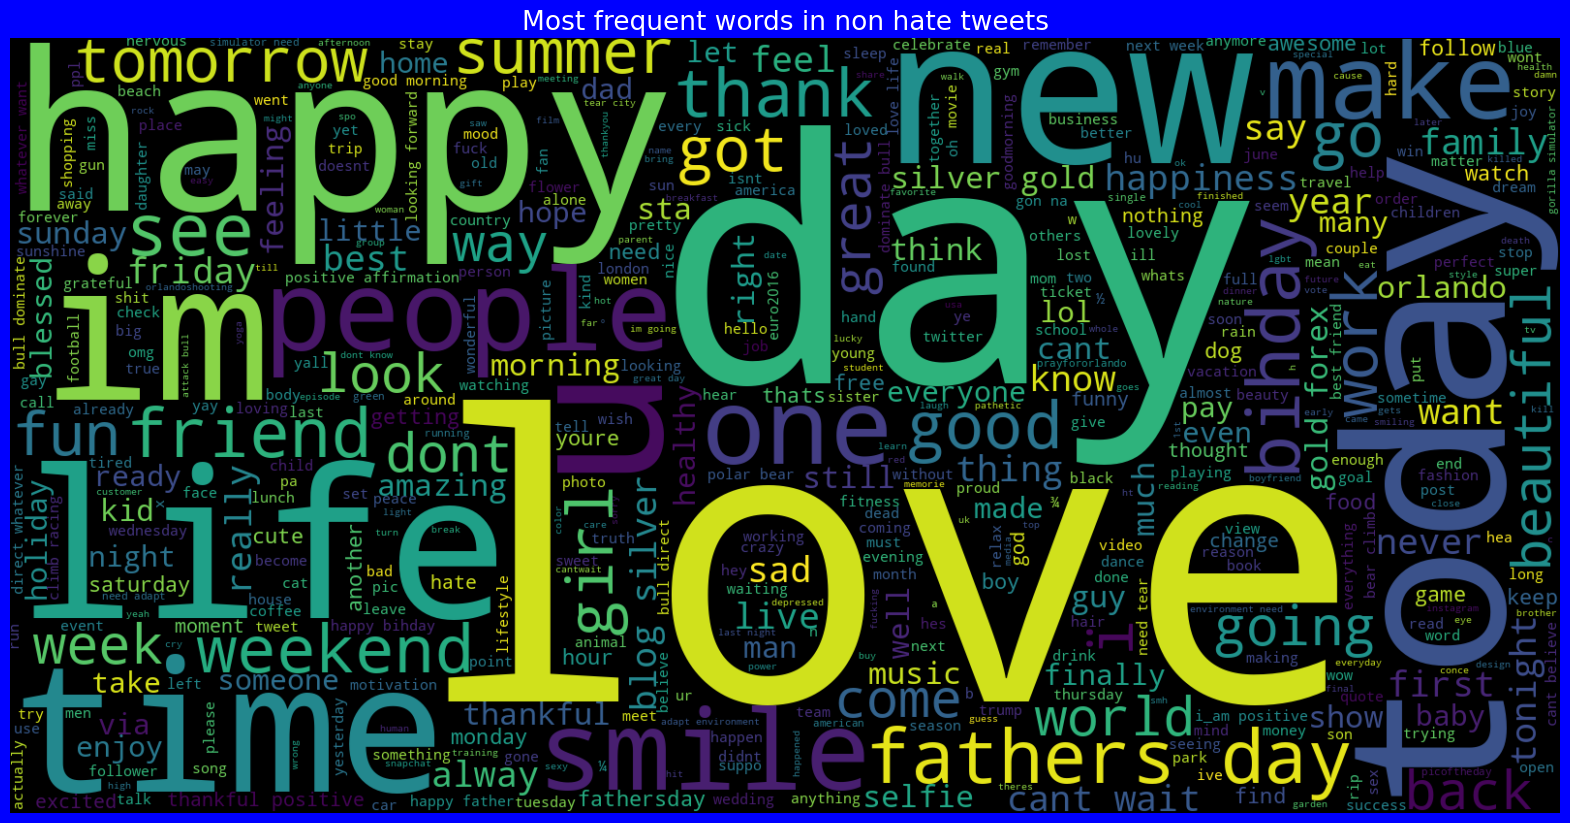

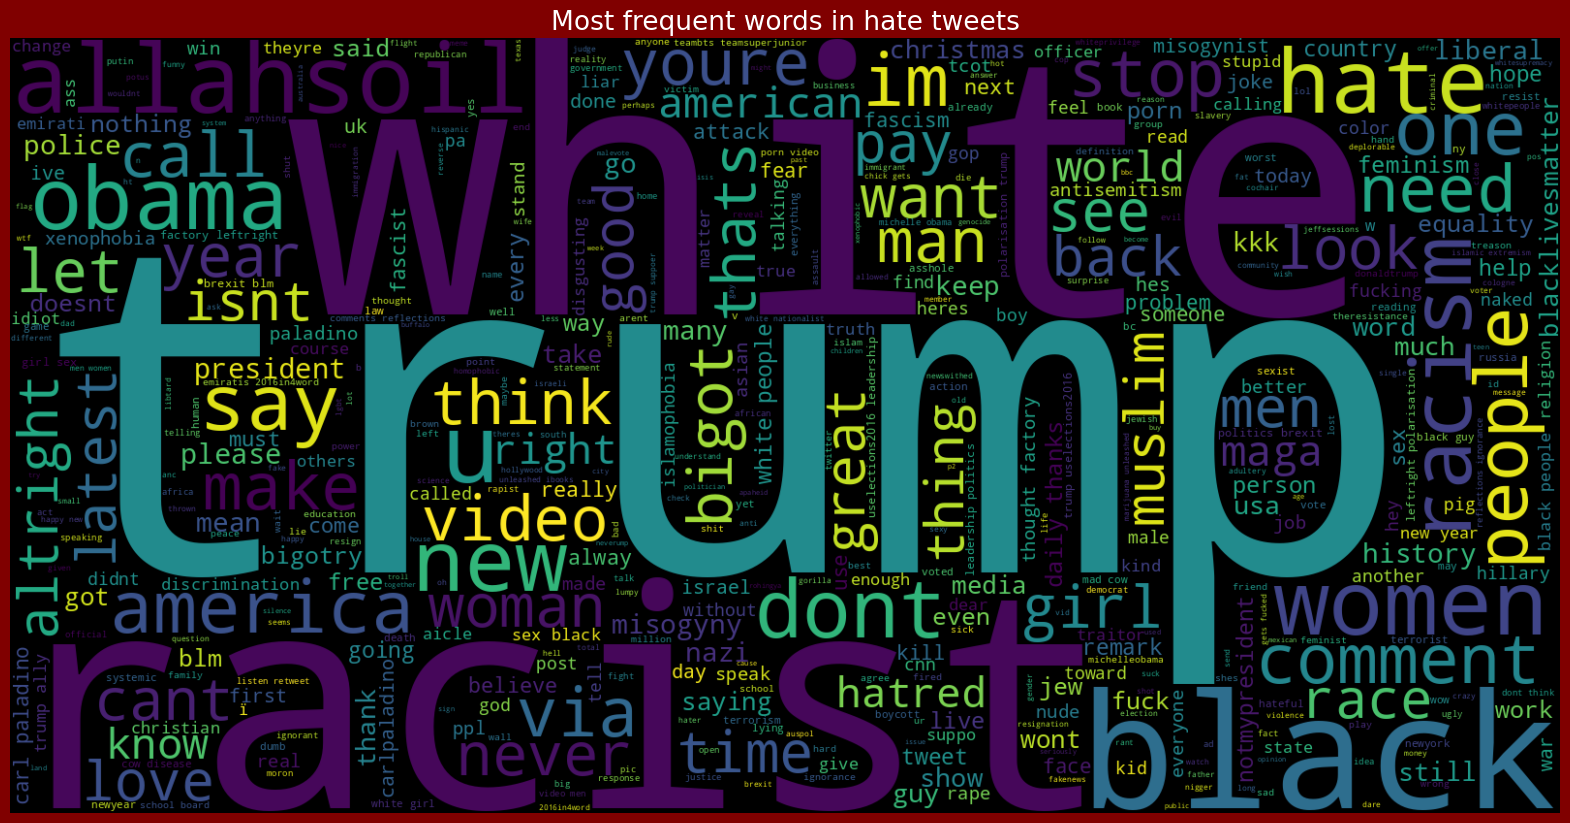

In [7]:
text = ' '.join([word for word in non_hate_tweets['tweet']])
plt.figure(figsize=(20,15), facecolor='blue')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in non hate tweets', fontsize = 19, color='white')
plt.show()
neg_tweets = tweet_df[tweet_df.label == 1]
neg_tweets.head()
text = ' '.join([word for word in neg_tweets['tweet']])
plt.figure(figsize=(20,15), facecolor='maroon')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in hate tweets', fontsize = 19, color='white')
plt.show()

In [8]:

vect = TfidfVectorizer(ngram_range=(1,3)).fit(tweet_df['tweet'])
feature_names = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
X = tweet_df['tweet']
Y = tweet_df['label']
X = vect.transform(X)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Number of features: 356105



Test accuarcy: 93.46%


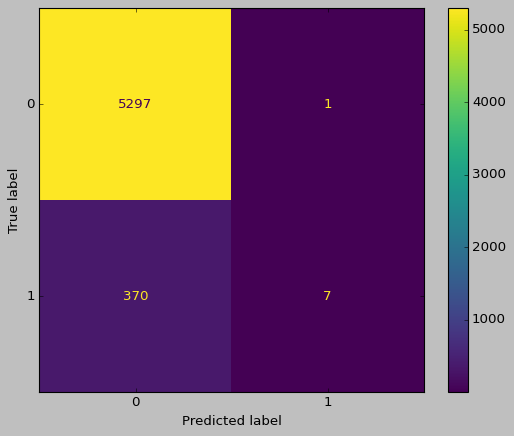

In [9]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_predict = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_predict, y_test)
print("Test accuarcy: {:.2f}%".format(logreg_acc*100))
style.use('classic')
cm = confusion_matrix(y_test, logreg_predict, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()

Best Cross validation score: 0.95
Best parameters:  {'C': 100, 'solver': 'lbfgs'}
Test accuracy: 95.30%
[[5290    8]
 [ 259  118]]


              precision    recall  f1-score   support

           0       0.95      1.00      0.98      5298
           1       0.94      0.31      0.47       377

    accuracy                           0.95      5675
   macro avg       0.94      0.66      0.72      5675
weighted avg       0.95      0.95      0.94      5675



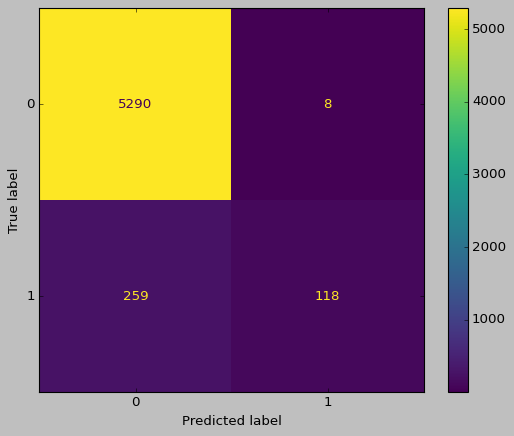

In [10]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
param_grid = {'C':[100, 10, 1.0, 0.1, 0.01], 'solver' :['newton-cg', 'lbfgs','liblinear']}
grid = GridSearchCV(LogisticRegression(), param_grid, cv = 5)
grid.fit(x_train, y_train)
print("Best Cross validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
y_pred = grid.predict(x_test)
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()

In [86]:
best_model = grid.best_estimator_
new_data_point = [""]
new_data_point = vect.transform(new_data_point)
output = best_model.predict(new_data_point)[0]
print(output)
if output==0:
    print("Not hate speech")
else:
    print("Hate Speech")

0
Not hate speech
